#### 네이버 뉴스 검색 API

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import os
import nltk
from time import time
from scipy.io.arff import loadarff
from scipy import stats
from statsmodels.formula.api import ols, glm
from functools import reduce     
import re
import sys
import urllib.request

from nltk.tokenize import word_tokenize   
from nltk.corpus import stopwords         
from nltk.stem import WordNetLemmatizer    
from collections import Counter 
from wordcloud import STOPWORDS, WordCloud
import glob           
import konlpy
import json

from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

import matplotlib
import matplotlib.font_manager as fm

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
#pd.set_option('display.max_row', None)

In [3]:
# 네이버 뉴스 검색 API

client_id = "2oMII3aNFw4Ixrv4yTLR"
client_secret = "RxaobQ9vnZ"

query = urllib.parse.quote(input("검색 질의: "))
idx = 0
display = 100 
start = 1
end = 1000
sort = 'sim'   #sim:정확도, date:날짜내림차순

news_df = pd.DataFrame(columns=("Title", "Original Link", "Link", "Description", "Publication Date"))

for start_index in range(start, end, display):

    url = "https://openapi.naver.com/v1/search/news?query=" + query \
          + "&display=" + str(display) \
          + "&start=" + str(start_index) \
          + "&sort=" + sort
    
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        response_dict = json.loads(response_body.decode('utf-8'))
        items = response_dict['items']
        for item_index in range(0, len(items)):
            remove_tag = re.compile('<.*?>')
            title = re.sub(remove_tag, '', items[item_index]['title'])
            original_link = items[item_index]['originallink']
            link = items[item_index]['link']
            description = re.sub(remove_tag, '', items[item_index]['description'])
            pub_date = items[item_index]['pubDate']
            news_df.loc[idx] = [title, original_link, link, description, pub_date]
            idx += 1
    else:
        print("Error Code:" + rescode)
        
news_df

검색 질의: 레이 달리오


,Title,Original Link,Link,Description,Publication Date
0,"‘헤지펀드 대부’ 레이 달리오, 브리지워터 경영권 승계 마무리",https://biz.chosun.com/international/internati...,https://n.news.naver.com/mnews/article/366/000...,헤지펀드 업계의 큰 손으로 알려진 레이 달리오가 자신이 설립한 세계 최대 헤지펀드인...,"Wed, 05 Oct 2022 11:09:00 +0900"
1,"헤지펀드 대부 레이 달리오, &apos;215조원&apos; 굴리는 브리지워터 경영...",https://www.hankyung.com/finance/article/20221...,https://n.news.naver.com/mnews/article/015/000...,헤지펀드 업계 거물로 불리는 레이 달리오(73)가 자신이 창업한 브리지워터어소시에이...,"Wed, 05 Oct 2022 15:01:00 +0900"
2,"달리오, 자신이 만든 &apos;브리지워터&apos;서 손 떼…&quot;멘토로 남...",http://www.edaily.co.kr/news/newspath.asp?news...,https://n.news.naver.com/mnews/article/018/000...,헤지펀드 업계의 거물 레이 달리오(73)가 자신이 세운 세계 최대 헤지펀드 브리지워...,"Wed, 05 Oct 2022 15:23:00 +0900"
3,"&apos;헤지펀드 거물&apos; 레이 달리오, 브리지워터 경영서 은퇴",https://www.tokenpost.kr/article-107633,https://www.tokenpost.kr/article-107633,4일(현지시간) 블룸버그에 따르면 레이달리오는 브리지워터 경영권을 이사회에 넘기고 ...,"Wed, 05 Oct 2022 14:10:00 +0900"
4,"레이 달리오, 브릿지워터 경영 손 떼",http://www.fnnews.com/news/202210050213132139,https://n.news.naver.com/mnews/article/014/000...,세계 최대 헤지펀드인 브릿지워터 창업자인 억만장자 투자자 레이 달리오가 후계 구도를...,"Wed, 05 Oct 2022 02:22:00 +0900"
...,...,...,...,...,...
995,"&apos;버핏은 잭팟, 소로스는 울고&apos;…어떤 종목 샀길래 희비 엇갈렸나",https://www.joongang.co.kr/article/25049489,https://n.news.naver.com/mnews/article/025/000...,최근 14일(현지시간) 미국 증권거래위원회(SEC)에 공개한 투자 보고서를 통해 세...,"Sat, 19 Feb 2022 08:00:00 +0900"
996,[BOOKS] ‘펀드 황제’가 말하는 부채 위기 대처법,http://economychosun.com/client/news/view.php?...,http://economychosun.com/client/news/view.php?...,레이 달리오(사진) 브리지워터 어소시에이츠 창립자는 “현재 미국 경제가 1930년대...,"Tue, 09 Oct 2018 23:28:00 +0900"
997,&quot;고통+반성=발전&quot; 180兆 굴리는 &apos;헤지펀드의 제왕&a...,http://news.hankyung.com/article/2019011003761,https://n.news.naver.com/mnews/article/015/000...,Global CEO &amp; Issue focus 레이 달리오 브리지워터 창업자 ...,"Thu, 10 Jan 2019 16:59:00 +0900"
998,달리오 &quot;연준 긴축에도 강세장 계속될 것…주목할 자산은&quot;,http://news.einfomax.co.kr/news/articleView.ht...,http://news.einfomax.co.kr/news/articleView.ht...,월가 유수 헤지펀드 브리지워터 어소시에이츠 운영자 레이 달리오는 연방준비제도(Fed...,"Fri, 07 Jan 2022 10:46:00 +0900"


In [4]:
news_df = news_df[news_df['Publication Date'].str.contains('2022', 'Sep')]

In [5]:
df_title = news_df['Title']
df_title

0                     ‘헤지펀드 대부’ 레이 달리오, 브리지워터 경영권 승계 마무리
1      헤지펀드 대부 레이 달리오, &apos;215조원&apos; 굴리는 브리지워터 경영...
2      달리오, 자신이 만든 &apos;브리지워터&apos;서 손 떼…&quot;멘토로 남...
3               &apos;헤지펀드 거물&apos; 레이 달리오, 브리지워터 경영서 은퇴
4                                   레이 달리오, 브릿지워터 경영 손 떼
                             ...                        
989            [글로벌포스트] &apos;채권왕&apos; 빌 그로스도 비트코인 투자했다
990          증시 흔들리자 주목받는 EMP 펀드...&apos;분산 투자 끝판왕&apos;
993                 [아무튼, 주말] 이 남자의 ‘푸른 호랑이’가 청와대에 걸린 이유
995        &apos;버핏은 잭팟, 소로스는 울고&apos;…어떤 종목 샀길래 희비 엇갈렸나
998            달리오 &quot;연준 긴축에도 강세장 계속될 것…주목할 자산은&quot;
Name: Title, Length: 531, dtype: object

In [6]:
df_title.to_csv('df_title.txt', index=False, header=None, sep='\t')

In [7]:
# 1. 텍스트 읽어오기

f = open("./df_title.txt",'rt',encoding='utf-8')
lines = f.readlines()
line = []
for i in range(len(lines)):
    line.append(lines[i])
f.close()

print(line)

['‘헤지펀드 대부’ 레이 달리오, 브리지워터 경영권 승계 마무리\n', '헤지펀드 대부 레이 달리오, &apos;215조원&apos; 굴리는 브리지워터 경영서 손 떼\n', '달리오, 자신이 만든 &apos;브리지워터&apos;서 손 떼…&quot;멘토로 남을 것&quot;\n', '&apos;헤지펀드 거물&apos; 레이 달리오, 브리지워터 경영서 은퇴\n', '레이 달리오, 브릿지워터 경영 손 떼\n', '레이 달리오, 브릿지워터 경영 손 떼\n', '레이 달리오 &quot;(달러) 현금 더 이상 쓰레기 아니다&quot;(상보)\n', '&apos;헤지펀드 대부&apos; 달리오 &quot;현금, 더 이상 쓰레기 아니다&quot;\n', '헤지펀드 거물 달리오, 브리지워터 경영권 이양…승계 마무리\n', '&apos;헤지펀드 대부&apos; 달리오, 브리지워터 경영 손뗀다\n', '&apos;헤지펀드 거물&apos; 레이 달리오, 브리지워터 경영 손뗀다\n', '“현금은 쓰레기” 주장하던 레이 달리오 “이젠 아니다”\n', '레이 달리오 &quot;(달러) 현금, 더 이상 쓰레기 아니다&quot;(1보)\n', '&apos;헤지펀드 거물&apos; 레이 달리오 &quot;금리 올라 이제 현금은 쓰레기 아냐&quot;\n', '달리오, 브릿지워터 경영에서 손떼 &quot;죽을 때까지 투자자로 남겠다&quot;\n', '‘헤지펀드 대부’ 달리오, 214조원 굴리는 회사 경영권 포기\n', '‘헤지펀드 대부’ 달리오, 경영권 이사회에 이양\n', '[오늘의 한경 글로벌마켓] 레이 달리오 &quot;현금에 대한 생각 변해…쓰레기 아니...\n', '레이 달리오 &quot;긴축 사이클은 이제 시작…2년 반은 힘든 시기&quot; [세지포 영상]\n', '딜링룸 24시…챙겨봐야 할 국제경제뉴스\n', '레이 달리오 &quot;현금 더는 쓰레기 아니다&quot;…단기 금리 적정\n', '[토큰포스트 브리핑] 전 SEC 위원장 &quot;암호화폐 규제, 스테이블코인부터

In [8]:
# 2. 특수문자 제거하기

compile = re.compile("[^ ㄱ-ㅣ가-힣]+")
for i in range(len(line)):
    a = compile.sub("",line[i])
    line[i] = a
print(line)

['헤지펀드 대부 레이 달리오 브리지워터 경영권 승계 마무리', '헤지펀드 대부 레이 달리오 조원 굴리는 브리지워터 경영서 손 떼', '달리오 자신이 만든 브리지워터서 손 떼멘토로 남을 것', '헤지펀드 거물 레이 달리오 브리지워터 경영서 은퇴', '레이 달리오 브릿지워터 경영 손 떼', '레이 달리오 브릿지워터 경영 손 떼', '레이 달리오 달러 현금 더 이상 쓰레기 아니다상보', '헤지펀드 대부 달리오 현금 더 이상 쓰레기 아니다', '헤지펀드 거물 달리오 브리지워터 경영권 이양승계 마무리', '헤지펀드 대부 달리오 브리지워터 경영 손뗀다', '헤지펀드 거물 레이 달리오 브리지워터 경영 손뗀다', '현금은 쓰레기 주장하던 레이 달리오 이젠 아니다', '레이 달리오 달러 현금 더 이상 쓰레기 아니다보', '헤지펀드 거물 레이 달리오 금리 올라 이제 현금은 쓰레기 아냐', '달리오 브릿지워터 경영에서 손떼 죽을 때까지 투자자로 남겠다', '헤지펀드 대부 달리오 조원 굴리는 회사 경영권 포기', '헤지펀드 대부 달리오 경영권 이사회에 이양', '오늘의 한경 글로벌마켓 레이 달리오 현금에 대한 생각 변해쓰레기 아니', '레이 달리오 긴축 사이클은 이제 시작년 반은 힘든 시기 세지포 영상', '딜링룸 시챙겨봐야 할 국제경제뉴스', '레이 달리오 현금 더는 쓰레기 아니다단기 금리 적정', '토큰포스트 브리핑 전  위원장 암호화폐 규제 스테이블코인부터 시작해', '포토 레이 달리오와의 대화', '금리  찍으면 주가  하락 거물투자자 레이 달리오 경고', '레이 달리오  감세정책 비판무능함 시사', ' 거물투자자 레이 달리오 금리  찍으면 주가 ', '레이 달리오 금리  찍으면 주가  하락할 것', '이더리움 머지 업그레이드에 대한 낙관과 비관비트코인   ', '투자의 전설 레이 달리오 브리지워터 경영권 넘긴다', '금리  되면 주가  폭락억만장자 레이 달리오의 경고', '투자의 전설 레이 달리오 미국주가 더 떨어진다', '레이 달리오  기준금리  찍으면 주가  떨어질 

In [9]:
# 3. 불용어 제거하기

stop_word = ["레이", "위", "소수점"]       # 사용하지 않을 단어 또는 문장 추가
line = [i for i in line if i not in stop_word]

In [10]:
# 4. 문장분석

okt = Okt()
result =[]
result = [okt.nouns(i) for i in line]   # 명사만 추출
final_result= [r for i in result for r in i]
print(final_result)

['헤지펀드', '대부', '레이', '브리지워터', '경영', '승계', '마무리', '헤지펀드', '대부', '레이', '조원', '굴리', '브리지워터', '경영', '손', '떼', '자신', '브리지워터', '손', '떼', '멘토', '남', '것', '헤지펀드', '거물', '레이', '브리지워터', '경영', '은퇴', '레이', '브릿지워터', '경영', '손', '떼', '레이', '브릿지워터', '경영', '손', '떼', '레이', '달러', '현금', '더', '이상', '쓰레기', '상보', '헤지펀드', '대부', '현금', '더', '이상', '쓰레기', '헤지펀드', '거물', '브리지워터', '경영', '이양승', '마무리', '헤지펀드', '대부', '브리지워터', '경영', '손', '헤지펀드', '거물', '레이', '브리지워터', '경영', '손', '현금', '쓰레기', '주장', '레이', '젠', '레이', '달러', '현금', '더', '이상', '쓰레기', '보', '헤지펀드', '거물', '레이', '금리', '이제', '현금', '쓰레기', '브릿지워터', '경영', '손떼', '죽', '때', '투자자', '헤지펀드', '대부', '조원', '굴리', '회사', '경영', '포기', '헤지펀드', '대부', '경영', '이사회', '이양', '오늘', '한경', '글로벌', '마켓', '레이', '현금', '대한', '생각', '쓰레기', '레이', '긴축', '사이클', '이제', '작년', '반', '시기', '세지', '포', '영상', '딜링룸', '시', '국제경제', '뉴스', '레이', '현금', '더', '쓰레기', '단기', '금리', '적정', '토큰', '포스트', '브리핑', '전', '위원장', '암호', '화폐', '규제', '스', '테이블', '코인', '시작', '포토', '레이', '대화', '금리', '주가', '하락', '거물', '투자자', '레이', '경고', '레이'

In [11]:
# 5. 텍스트에서 많이 나온 단어

korean = pd.Series(final_result).value_counts().head(50)
print("<단어 top 50>")
print(korean)

<단어 top 50>
투자       81
레이       80
주식       67
증권       66
헤지펀드     48
위        47
글로벌      45
미국       40
금리       39
하나       36
소수점      36
주        35
추가       33
더        33
것        33
베스트셀러    32
매매       31
비트코인     28
쓰레기      28
하락       28
세계       27
적립       27
대가       26
증시       24
월        22
이벤트      22
주가       21
주문       21
인플레      21
현금       21
경제       20
거물       20
기능       20
브리지워터    19
작별인사     18
기념       18
오픈       18
서비스      17
경고       17
채권       17
최대       17
뉴스       16
경영       16
년        16
시대       16
자산       16
준        15
역행       15
달러       15
경기       14
dtype: int64


In [12]:
korean = pd.DataFrame(korean)
korean = korean.reset_index()
korean.columns = ["추출단어", "횟수"]
korean

,추출단어,횟수
0,투자,81
1,레이,80
2,주식,67
3,증권,66
4,헤지펀드,48
5,위,47
6,글로벌,45
7,미국,40
8,금리,39
9,하나,36


In [13]:
korean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   추출단어    50 non-null     object
 1   횟수      50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


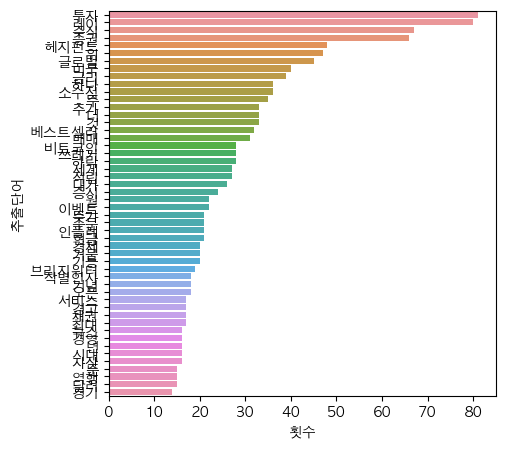

In [14]:
# 시각화 하기

plt.figure(figsize=(5,5))
sns.barplot(data=korean, y='추출단어', x='횟수');

In [15]:
# 생성된 데이터 프레임을 딕셔너리로 변환

wc = korean.set_index("추출단어").to_dict()["횟수"]
wc

{'투자': 81,
 '레이': 80,
 '주식': 67,
 '증권': 66,
 '헤지펀드': 48,
 '위': 47,
 '글로벌': 45,
 '미국': 40,
 '금리': 39,
 '하나': 36,
 '소수점': 36,
 '주': 35,
 '추가': 33,
 '더': 33,
 '것': 33,
 '베스트셀러': 32,
 '매매': 31,
 '비트코인': 28,
 '쓰레기': 28,
 '하락': 28,
 '세계': 27,
 '적립': 27,
 '대가': 26,
 '증시': 24,
 '월': 22,
 '이벤트': 22,
 '주가': 21,
 '주문': 21,
 '인플레': 21,
 '현금': 21,
 '경제': 20,
 '거물': 20,
 '기능': 20,
 '브리지워터': 19,
 '작별인사': 18,
 '기념': 18,
 '오픈': 18,
 '서비스': 17,
 '경고': 17,
 '채권': 17,
 '최대': 17,
 '뉴스': 16,
 '경영': 16,
 '년': 16,
 '시대': 16,
 '자산': 16,
 '준': 15,
 '역행': 15,
 '달러': 15,
 '경기': 14}

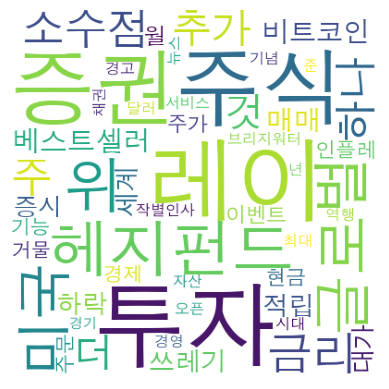

In [16]:
# 워드 클라우드 생성

wc = korean.set_index("추출단어").to_dict()["횟수"]
wordCloud = WordCloud(font_path='AppleGothic',width=400,height=400,
                     max_font_size=100,background_color='white'
                     ).generate_from_frequencies(wc)
#plt.figure()

plt.imshow(wordCloud)
plt.axis('off');